# SAS Multinomial LR Project - Multicollinearity Check
Jiyoung Kim (110075)

In [1]:
# Import packages
import pandas as pd
import numpy as np
#import sklearn import preprocessing

## For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Set font size for plotting
sns.set(font_scale=1.2)

In [2]:
# Load dataset
ess = pd.read_csv("/content/ess_final.csv", na_values=' ') 

ess.head()

,cntry,stfeco,stfgov,evmar,nbthcld,agea,hinctnta,Y
0,AT,3,3,1,2,43,Low income,Labour Income
1,AT,3,3,1,3,67,Medium income,Social Grants/Benefit Income
2,AT,2,2,1,1,40,High income,Labour Income
3,AT,2,3,1,1,63,Medium income,Capital Income
4,AT,3,3,1,3,71,Low income,Social Grants/Benefit Income


In [3]:
ess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38053 entries, 0 to 38052
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     38053 non-null  object
 1   stfeco    38053 non-null  int64 
 2   stfgov    38053 non-null  int64 
 3   evmar     38053 non-null  int64 
 4   nbthcld   38053 non-null  int64 
 5   agea      38053 non-null  int64 
 6   hinctnta  38053 non-null  object
 7   Y         38053 non-null  object
dtypes: int64(5), object(3)
memory usage: 2.3+ MB


In [4]:
# Wrong data type revision
ess["stfeco"] = ess["stfeco"].astype(str)
ess["stfgov"] = ess["stfgov"].astype(str)
ess["evmar"] = ess["evmar"].astype(str)
ess.dtypes

cntry       object
stfeco      object
stfgov      object
evmar       object
nbthcld      int64
agea         int64
hinctnta    object
Y           object
dtype: object

###**Multicollinearity / Correlation**

Checking correlation between variables, drawing correlation matrix using Pearson and Cramer's V coefficient.




##### **Pearson correlation matrix for continuous variables: nbthcld, agea**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

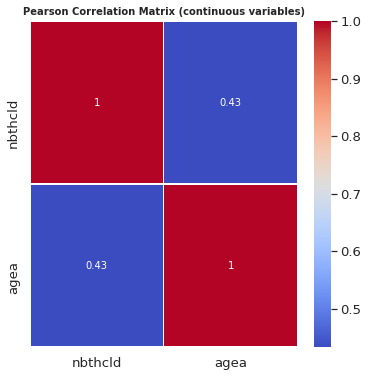

In [7]:
cont_var = ess[["nbthcld", "agea"]]
corr = cont_var.corr(method = 'pearson') #correlation matrix for float and int 

corr_map = plt.figure(figsize=(6,6))
plt.title("Pearson Correlation Matrix (continuous variables)", fontsize =10, weight = 'bold')
our_map = sns.heatmap (corr, xticklabels = corr.columns, cmap='coolwarm', yticklabels = corr.columns, linewidths =.75, annot = True)

from google.colab import files
plt.savefig("cont_corr.png")
files.download("cont_corr.png") 

As for continuous variablels, let's take a closer look at their distribution one more time.

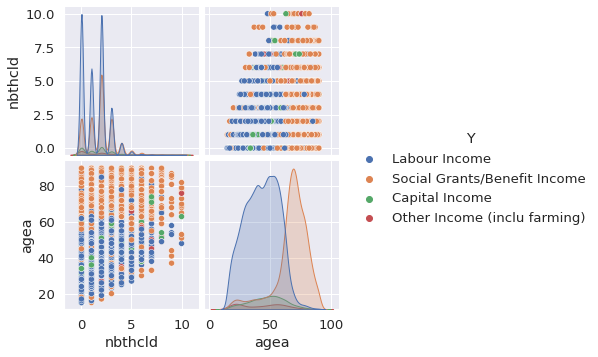

In [8]:
sns.pairplot(ess,vars = ["nbthcld", "agea"], hue="Y")

#### **Cramer's V correlation matrix for categorical variables**

In [9]:
columns_all =[]
for column in ess.columns:
  if ess[column].nunique() <5:
    columns_all.append(column)

In [10]:
import scipy.stats as ss

df_corr = ess[columns_all]
# Cramer's V for categorical correlations
def cramers_v(x, y):
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramersv = pd.DataFrame(index=df_corr.columns,columns=df_corr.columns)
columns = df_corr.columns

for i in range(0,len(columns)):
    for j in range(0,len(columns)):
        #print(data[columns[i]].tolist())
        u = cramers_v(df_corr[columns[i]].tolist(),df_corr[columns[j]].tolist())
        cramersv.loc[columns[i],columns[j]] = u
        
cramersv.fillna(value=np.nan,inplace=True)

In [11]:
Y_only = cramersv[['Y']]
new_Y = Y_only.sort_values(by=['Y'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

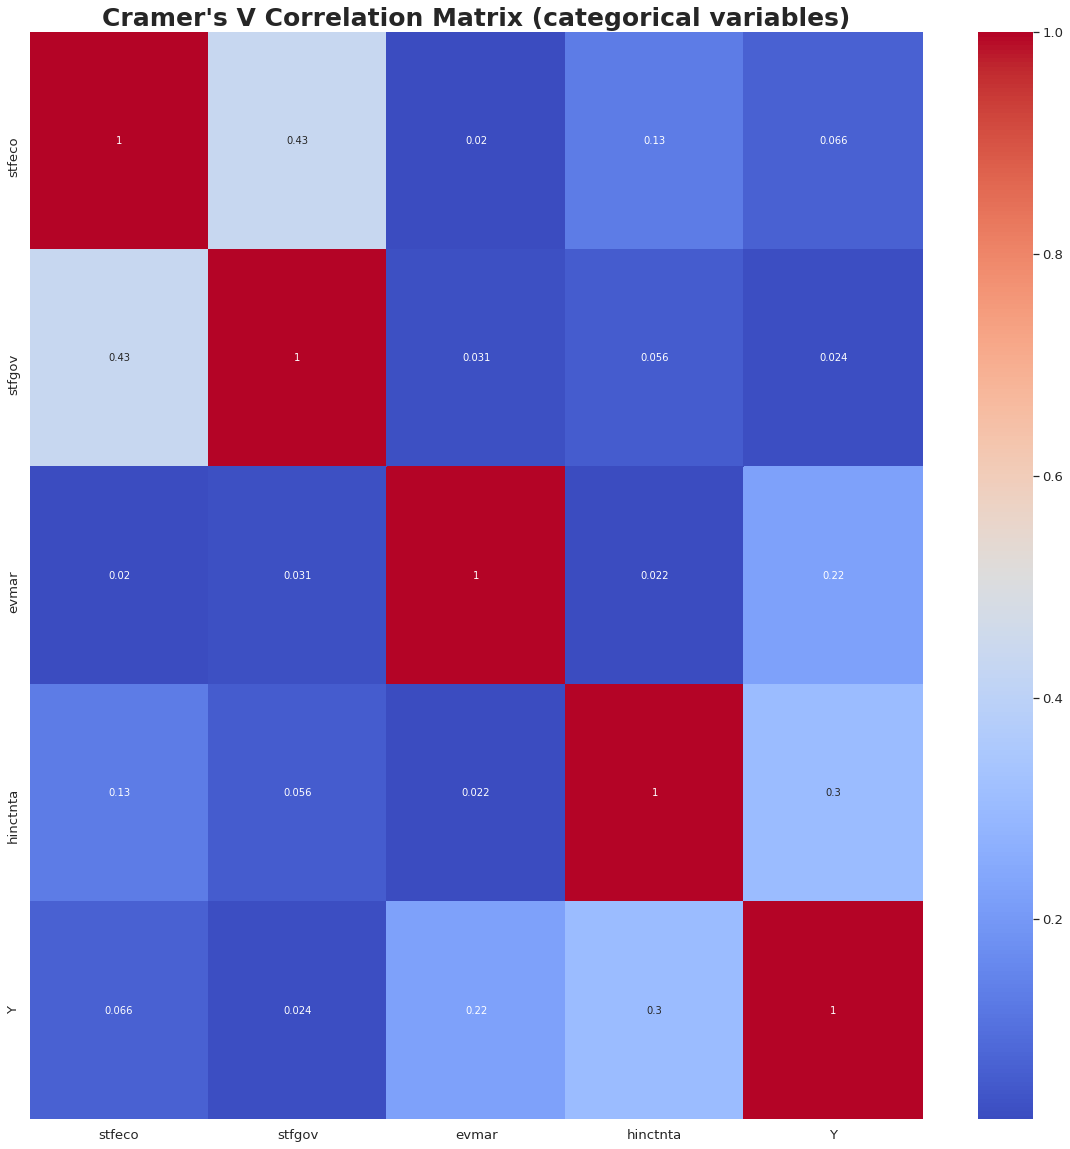

In [12]:
plt.figure(figsize=(20,20))
plt.title("Cramer's V Correlation Matrix (categorical variables)", fontsize =25, weight = 'bold')
ax = sns.heatmap(cramersv,cmap="coolwarm", annot = True )
plt.savefig("cat_corr.png")
files.download("cat_corr.png") 
plt.show()

Check correlation importance by focusing on our target variable 'Y' in here:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

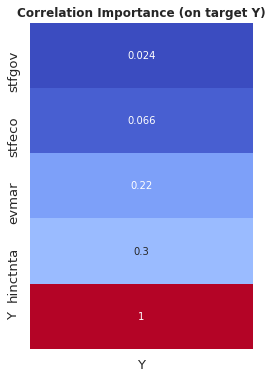

In [13]:
plt.figure(figsize=(4,6))
plt.title("Correlation Importance (on target Y)", fontsize =12, weight = 'bold')
sns.heatmap(new_Y, cmap="coolwarm", annot=True, cbar = False)
plt.savefig("imp_corr.png")
files.download("imp_corr.png") 